### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('data/coffee_dataset.csv')
coffee_sample = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_sample.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [2]:
mean_drinkers=coffee_sample.drinks_coffee.mean()
mean_non_drinkes=1-mean_drinkers

print('Proportion of coffee drinkers: {}'.format(mean_drinkers))
print('Proportion of non coffee drinkers: {}'.format(mean_non_drinkes))

Proportion of coffee drinkers: 0.595
Proportion of non coffee drinkers: 0.405


`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [3]:
mean_height_drinkers=coffee_sample[coffee_sample.drinks_coffee]['height'].mean()
mean_height_non_drinkes=coffee_sample[coffee_sample.drinks_coffee==False]['height'].mean()

print('Average height of drinkers: {}'.format(mean_height_drinkers))
print('Average height of non drinkers: {}'.format(mean_height_non_drinkes))

Average height of drinkers: 68.11962990858618
Average height of non drinkers: 66.78492279927877


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [6]:
sample_200=coffee_sample.sample(200, replace=True)
sample_200_drinkers_mean=sample_200.drinks_coffee.mean()
sample_200_non_drinkers_mean=1-sample_200_drinkers_mean

print('Proportion of coffee drinkers in new sample of 200: {}'.format(sample_200_drinkers_mean))
print('Proportion of non coffee drinkers in new sample of 200: {}'.format(sample_200_non_drinkers_mean))

Proportion of coffee drinkers in new sample of 200: 0.6
Proportion of non coffee drinkers in new sample of 200: 0.4


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [7]:
boot_means=[]
for _ in range(10000):
    bootsample=coffee_sample.sample(200, replace=True)
    boot_mean = bootsample[bootsample.drinks_coffee==False]['height'].mean()
    boot_means.append(boot_mean)

(array([  16.,  106.,  590., 1830., 2990., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <BarContainer object of 10 artists>)

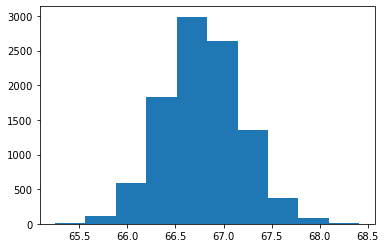

In [8]:
import matplotlib.pyplot as plt
plt.hist(boot_means)

In [10]:
# calculate the 95% confidence interval for the mean heights
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.9929132815752, 67.58402738281573)

In [11]:
# Q: Did your interval capture the true mean height for the non-coffee drinkers?
coffee_full[coffee_full.drinks_coffee==False]['height'].mean()

# Ans: yes (66.443 is within the confidence interval)

66.44340776214705